# `Housing Price Prediction Assignment`
*The purpose of this assignment is to build a regression model using regularization, so as to predict the actual value of the prospective properties with the available independent variables and decide whether to invest in them or not.*

*The assignment has 3 objectives:*

 - Which variables are significant in predicting the price of a house
 - How well those variables describe the price of a house
 - The optimal value of lambda for ridge and lasso regression

## Step 1: Importing packages, Reading & Inspecting Data

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
from datetime import datetime as dt
import scipy.stats as stats
from scipy.stats import norm, skew #for some statistics
import re

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# For building model
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_mldata
from sklearn import metrics
from RegscorePy import *

#Limiting floats output to 3 decimal points
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 

In [3]:
#reading Dataset
house_price = pd.read_csv("train.csv",  sep = ',',encoding = "ISO-8859-1")
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Checking the datatypes
house_price.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [5]:
# Checking the shape of the dataframe
house_price.shape

(1460, 81)

## Step 2: Data Visualization

*Visualizing the given data to derive implicit relationship between dependent and independent variables*

### Dependent Variable: Univariate Analysis

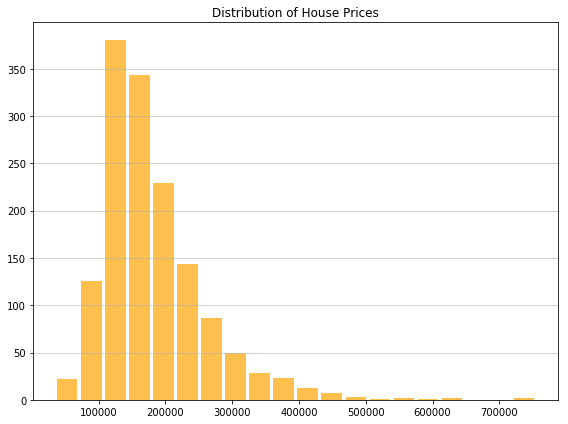

In [6]:
plt.subplots(figsize=(8,6))
plt.hist(house_price['SalePrice'],alpha=0.7,color='orange',bins=20,rwidth=.85)
plt.grid(axis='y', alpha=0.75)
plt.title('Distribution of House Prices')
#sns.distplot(house_price['SalePrice'], color='blue', rug=True)
# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

*The house prices are right-skewed with most houses in the price range of 100k to 250k*

### Independent Categorical Variables: Univariate Analysis

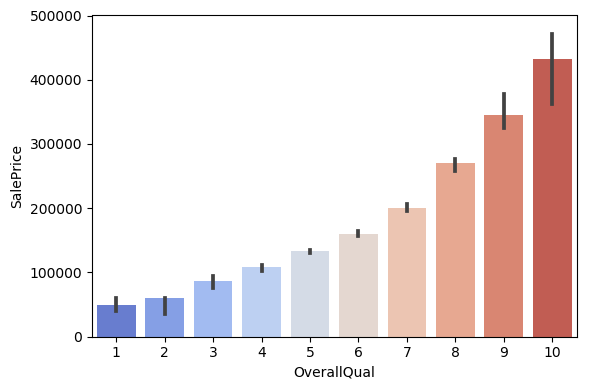

In [7]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(6,4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.barplot(y='SalePrice', x='OverallQual',palette='coolwarm', data=house_price, estimator=np.median)
# plot y axis limits
plt.ylim([0, 500000])

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

*The the overall quality of a house turns out to be the strongest predictor for the sale price. The median price increases gradually with increase in house quality.*

### Correlation between Dependent and Independent Variables: Multivariate Analysis

*Plotting the heatmap showing the correlation between the top 10 variables*

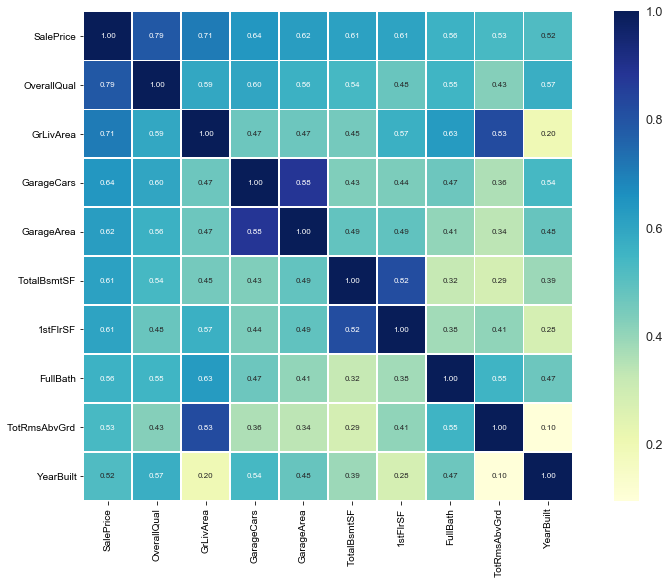

In [8]:
corrmat = house_price.corr()
plt.subplots(figsize=(15, 9))

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house_price[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values,cmap="YlGnBu", linewidths=.5)
plt.show()

*With the help of the matrix we can see the most important features for SalePrice is 'OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt', 'FullBath', 'TotalBsmtSF'. Let us investigate them further.*

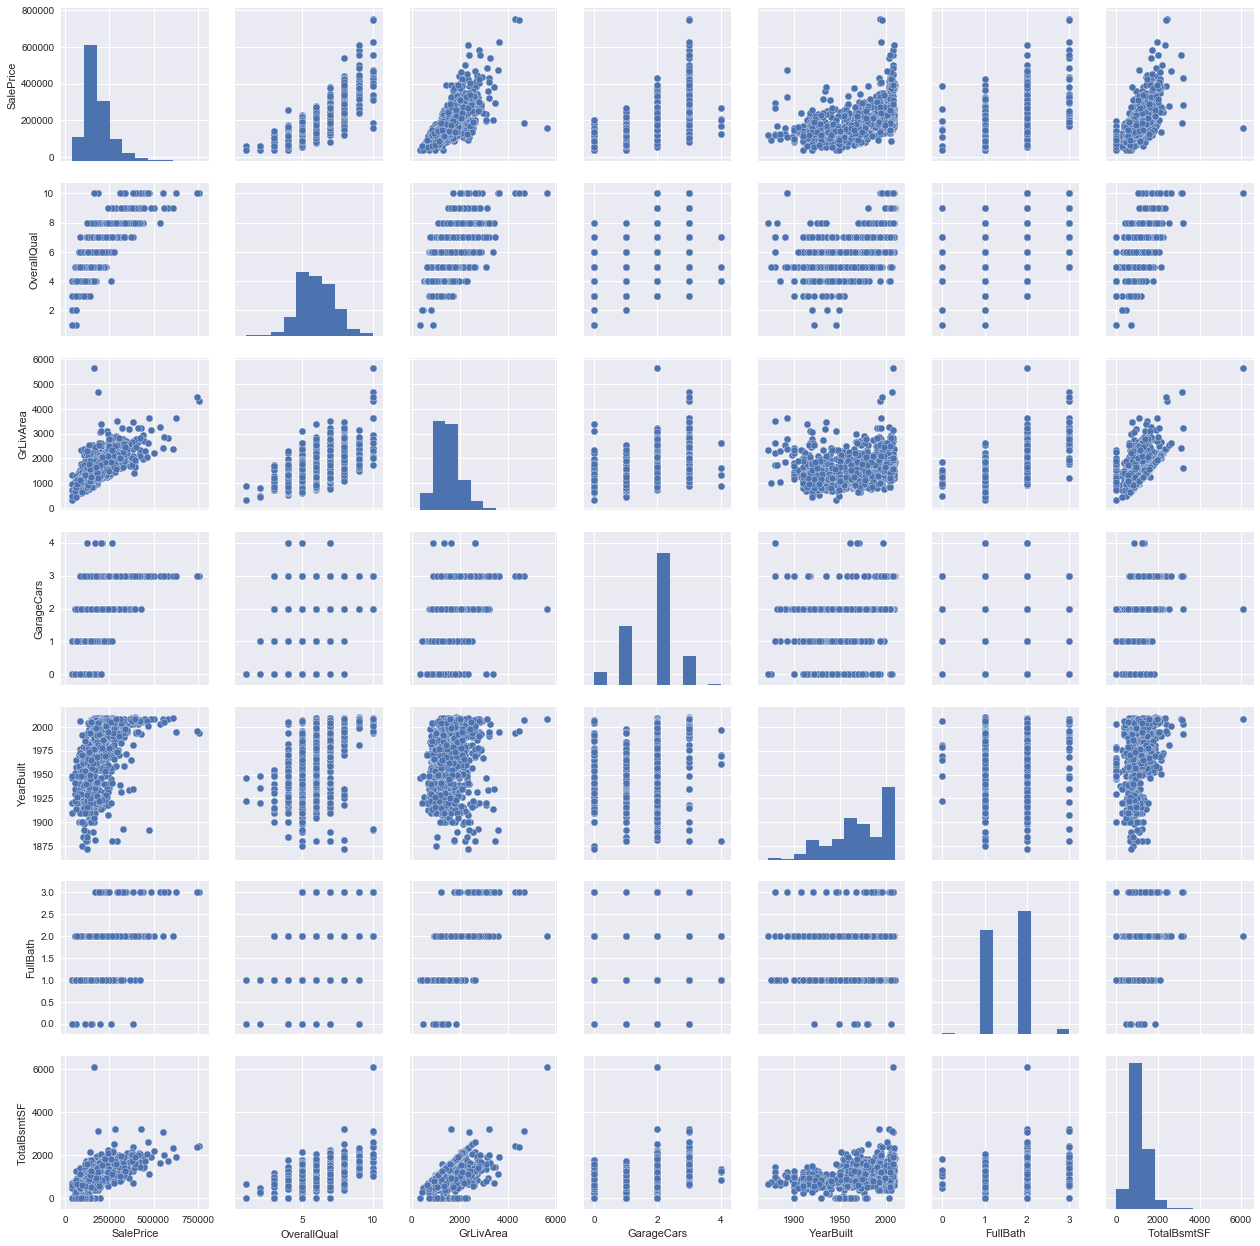

In [9]:
# Plotting a pairmap between highly correlated variables
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt', 'FullBath', 'TotalBsmtSF']
sns.pairplot(house_price[cols], size = 2.5)
plt.show();

## Step 3: Data Preparation

### Handling Duplicate Rows

In [10]:
# removing duplicate rows
house_price.drop_duplicates(subset='Id')
house_price.shape

(1460, 81)

### Dropping Unnecessary Columns NOT needed for Analysis

In [11]:
# Identifying if any column exists with only null values
house_price.isnull().all(axis=0).any()

False

In [12]:
# Dropping all columns with only 0 values
house_price.loc[:, (house_price != 0).any(axis=0)]
house_price.shape

(1460, 81)

In [13]:
#Remove columns which has only one unique value  
house_price= house_price.loc[:,house_price.nunique()!=1]
house_price.shape

(1460, 81)

In [14]:
#For the categorical feature 'Utilities', all records are "AllPub", except for one "NoSeWa" 
# Thus this feature won't help in predictive modelling. We can then safely remove it.
print(house_price['Utilities'].value_counts())
house_price = house_price.drop(['Utilities'], axis=1)
print(house_price.shape)

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
(1460, 80)


### Handling Null Values

In [15]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(house_price.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(house_price.isnull().sum()/house_price.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
PoolQC,1453,99.520
MiscFeature,1406,96.300
Alley,1369,93.770
Fence,1179,80.750
FireplaceQu,690,47.260
LotFrontage,259,17.740
GarageType,81,5.550
GarageFinish,81,5.550
GarageQual,81,5.550
GarageCond,81,5.550


### *Visualizing occurence of Null values in the columns based on rows*

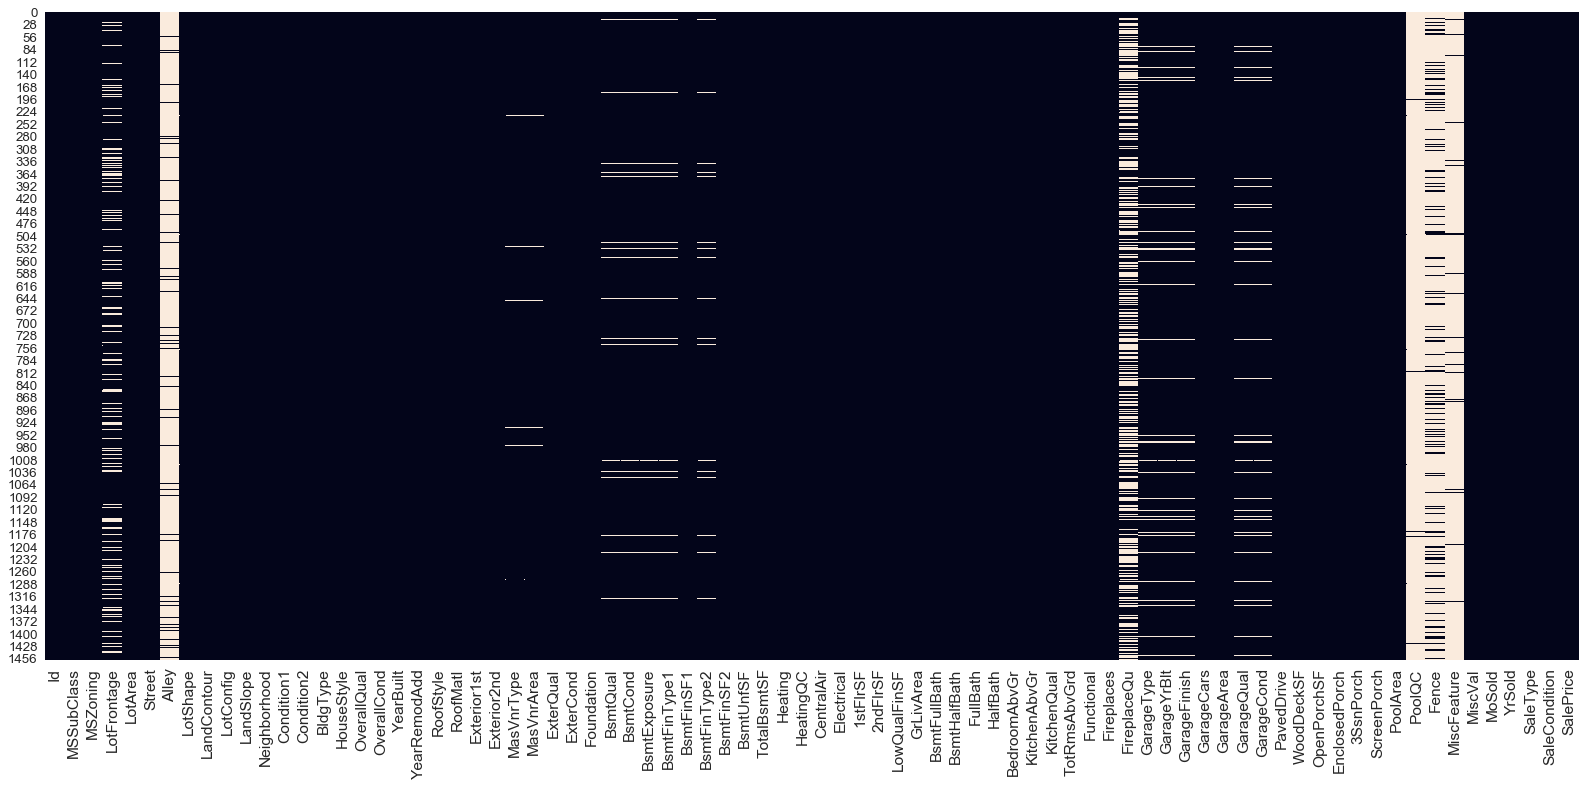

In [16]:
plt.figure(figsize=(20,10), dpi=80, facecolor='w', edgecolor='k', frameon='True')
sns.heatmap(house_price.isnull(), cbar=False)
plt.xticks(size = 14)
plt.yticks(size = 12)
plt.tight_layout()
plt.show()

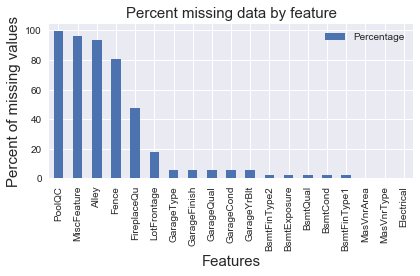

In [17]:
# Percentage of null values in the variables
percentage = percentage.loc[percentage['Percentage'] > 0]
percentage.plot.bar()
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.tight_layout()
plt.show()

### Inspecting the data Correlation

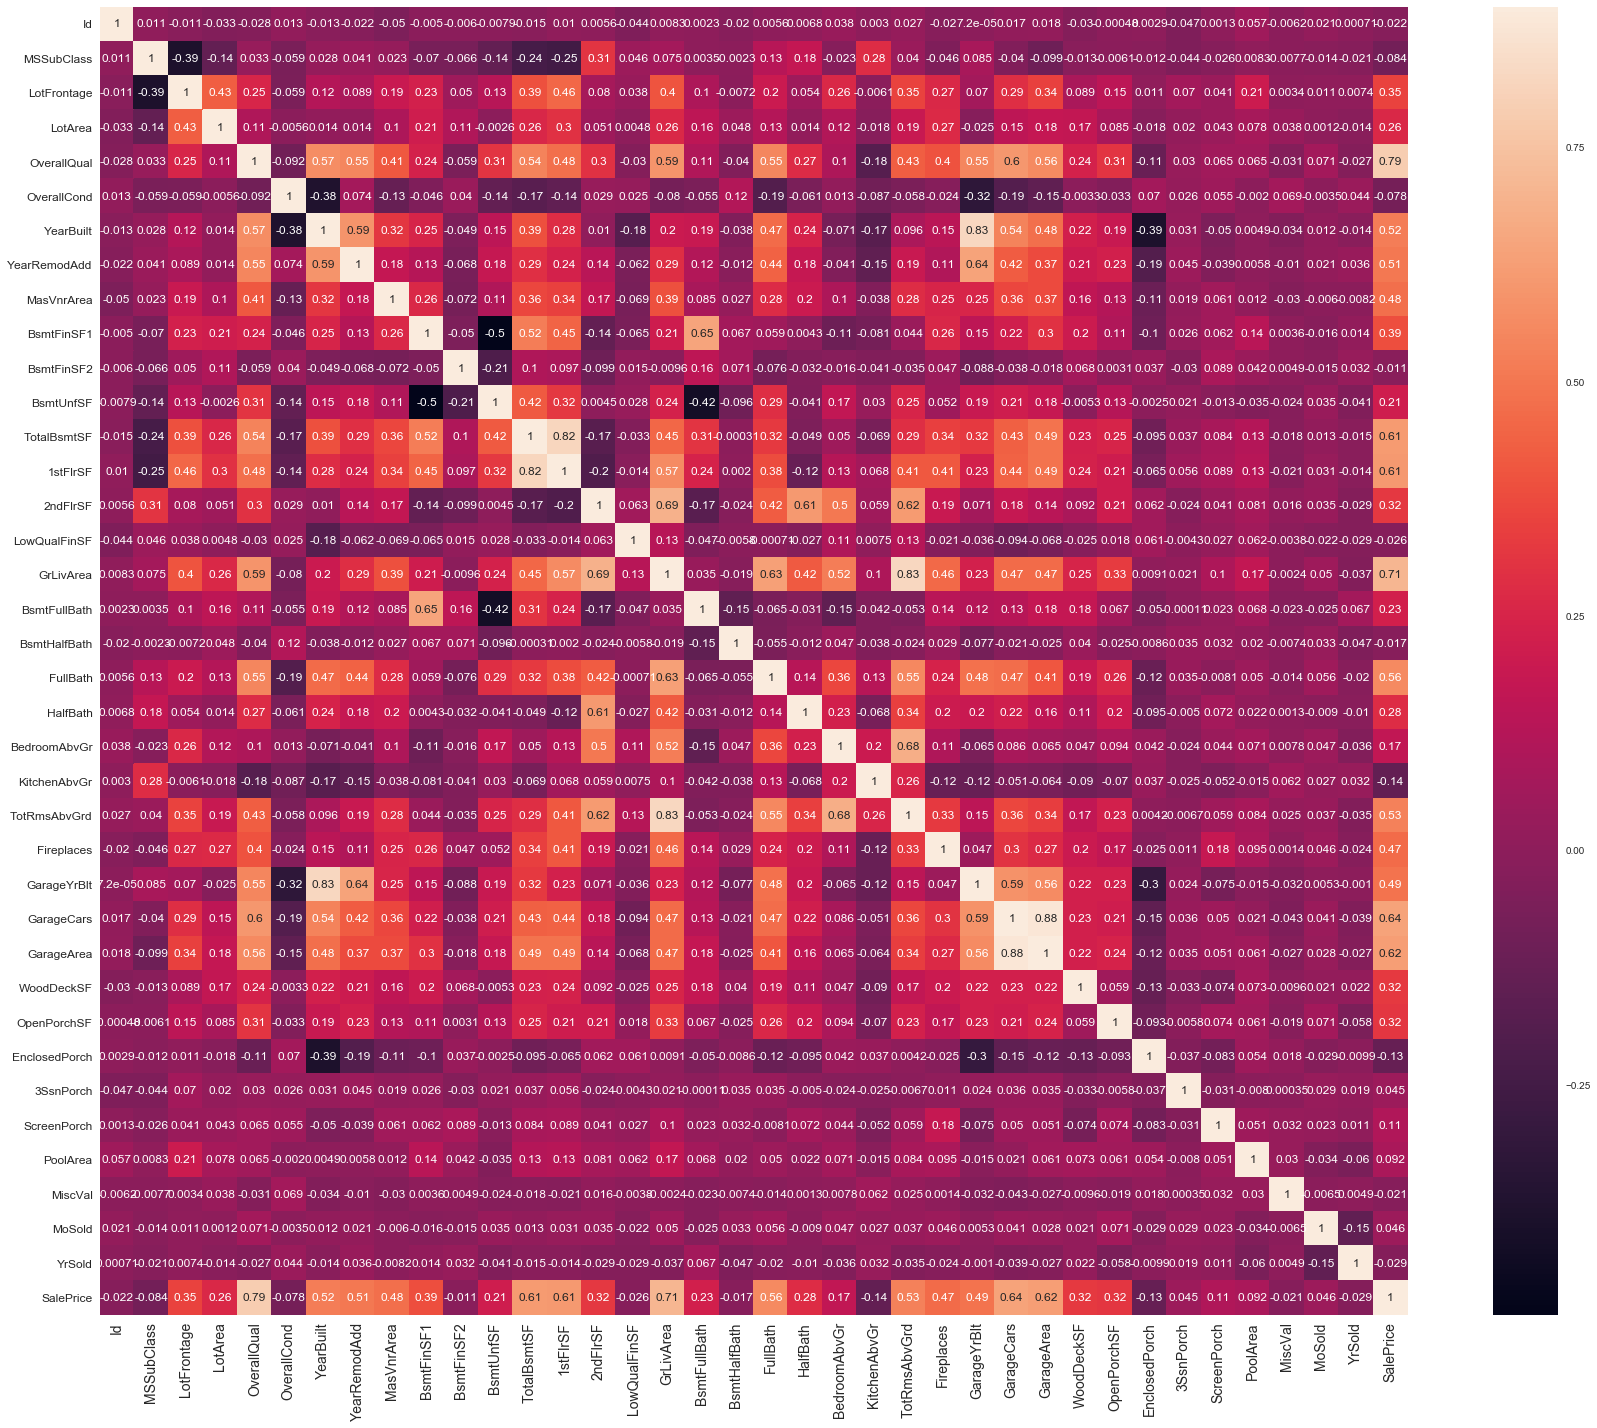

In [18]:
#Correlation map to see how features are correlated with SalePrice
corrmat = house_price.corr()
plt.subplots(figsize=(25,20))
sns.heatmap(corrmat, vmax=0.9, square=True, annot = True)
plt.xticks(size = 14)
plt.yticks(size = 12)
plt.tight_layout()
plt.show()

In [19]:
garage_built_with_house=house_price.loc[house_price['GarageYrBlt']==house_price['YearBuilt']]
round(100*(garage_built_with_house.shape[0]/house_price.shape[0]))

75

### From the above heatmap, we can conclude the following:

 - `GarageYrBlt` (year the garage was built) and `YearBuilt` (year the house was built) had a very strong positive correlation of `0.83`. In fact, almost 75% of these values were exactly the same. Hence, we decided to drop `GarageYrBlt` since it had many missing values(`5.55%`) which could be compensated by `YearBuilt`.
 - `GrLivArea` (Above grade (ground) living area square feet) and `TotRmsAbvGrd` (Total rooms above grade (does not include bathrooms)) had a very strong positive correlation of `0.83`. Hence, we decided to drop `TotRmsAbvGrd` which could be compensated by `GrLivArea`.
 - `GarageCars` (Size of garage in car capacity) and `GarageArea` (Size of garage in square feet) had a very strong positive correlation of `0.88`. Hence, we decided to drop `GarageCars` which could be compensated by `GarageArea`.
 - `TotalBsmtSF`(Total square feet of basement area) and `1stFlrSF`(First Floor square feet) had a very strong positive correlation of `0.82`. Clearly area related features are very important to determine house prices, we add one derived feature which is the total area of basement, first and second floor areas of each house. And we drop `TotalBsmtSF`,`1stFlrSF`,`2ndFlrSF`. 

In [20]:
# Adding total sqfootage feature 
house_price['TotalSF'] = house_price['TotalBsmtSF'] + house_price['1stFlrSF'] + house_price['2ndFlrSF']
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2566
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2524
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2706
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2473
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,3343


*Plotting TotalSF and SalePrice to inspect the relationship*

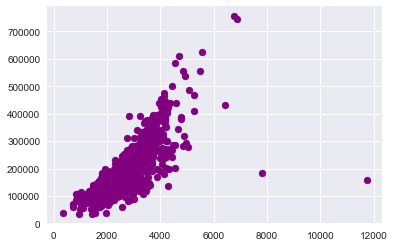

In [21]:
plt.scatter(house_price['TotalSF'], house_price['SalePrice'], color='purple')
plt.show()

In [22]:
# Deleting the columns 'GarageYrBlt','TotRmsAbvGrd','GarageCars','TotalBsmtSF','1stFlrSF','2ndFlrSF' as per the above analysis
columns_to_drop = ['GarageYrBlt','TotRmsAbvGrd','GarageCars','TotalBsmtSF','1stFlrSF','2ndFlrSF']
house_price = house_price.drop(columns_to_drop, axis=1)
house_price.shape

(1460, 75)

### Imputing missing values

#### *For missing data, such as pool quality and pool area - where a missing value means there is no pool in this house - we replace the missing value with 0 for numeric variables and “None” for categorical variables. However, for missing data that are missing at random, we use other variables to impute the value.*

|Features|Feature Type|Missing Type|Action|
|--------|------------|------------|------|  
|PoolQC|Categorical|Missing Not at Random|NA with None| 
|MiscFeature|Categorical|Missing Not at Random|NA with None|
|Alley|Categorical|Missing Not at Random|NA with None|
|Fence|Categorical|Missing Not at Random|NA with None|
|FireplaceQu|Categorical|Missing Not at Random|NA with None|
|GarageType,GarageFinish,GarageQual,GarageCond|Categorical|Missing Not at Random|NA with None|
|BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2|Categorical|Missing Not at Random|NA with None|
|MasVnrType|Categorical|Missing Not at Random|NA with None|
|MasVnrArea|Numerical|Missing Not at Random|NA with 0|
|LotFrontage|Numerical|Missing at Random|Impute using other variables|
|Electrical|Categorical|Missing at Random|Impute using other variables|

In [23]:
# Impute Null values in following columns with 'None' as per data description:

"""
PoolQC,
MiscFeature,
Alley,
Fence,
FireplaceQu,
GarageType,GarageFinish,GarageQual,GarageCond,
BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,
MasVnrType
"""  
columns_to_impute = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
                     'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType']
house_price[columns_to_impute] = house_price[columns_to_impute].fillna("None")
house_price.shape

(1460, 75)

In [24]:
# Replacing missing data with 0 for the column 'MasVnrArea'
house_price["MasVnrArea"] = house_price["MasVnrArea"].fillna(0)
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,Inside,...,None,None,None,0,2,2008,WD,Normal,208500,2566
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,FR2,...,None,None,None,0,5,2007,WD,Normal,181500,2524
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,Inside,...,None,None,None,0,9,2008,WD,Normal,223500,2706
3,4,70,RL,60.000,9550,Pave,None,IR1,Lvl,Corner,...,None,None,None,0,2,2006,WD,Abnorml,140000,2473
4,5,60,RL,84.000,14260,Pave,None,IR1,Lvl,FR2,...,None,None,None,0,12,2008,WD,Normal,250000,3343


In [25]:
# The column 'Electrical' has one NA value.Imputing the missing value with the modal(most commonly occuring value) value.
print(house_price['Electrical'].mode())
house_price['Electrical'] = house_price['Electrical'].fillna(house_price['Electrical'].mode()[0])
print(house_price.shape)

0    SBrkr
dtype: object
(1460, 75)


In [26]:
# LotFrontage : Since the area of each street connected to the house property most likely have a similar area 
# to other houses in the same neighborhood we fill in missing value for this column by the median LotFrontage 
# of the street of respective neighborhood.

house_price["LotFrontage"] = house_price.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
house_price.shape

(1460, 75)

### Reinspecting Null Values

In [27]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(house_price.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(house_price.isnull().sum()/house_price.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1).head()

,Total,Percentage
TotalSF,0,0.000
YearBuilt,0,0.000
RoofStyle,0,0.000
RoofMatl,0,0.000
Exterior1st,0,0.000


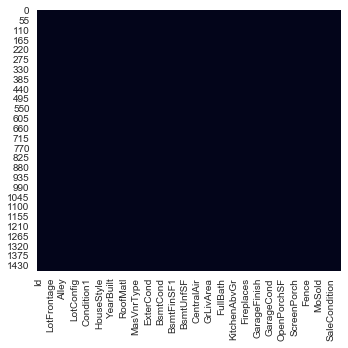

In [28]:
plt.figure(figsize=(5,5))
sns.heatmap(house_price.isnull(), cbar=False)

plt.tight_layout()
plt.show()

### Checking for Outliers

In [29]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
house_price.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Id,1460.000,730.500,421.610,1.000,365.750,730.500,1095.250,1314.100,1387.050,1445.410,1460.000
MSSubClass,1460.000,56.897,42.301,20.000,20.000,50.000,70.000,120.000,160.000,190.000,190.000
LotFrontage,1460.000,70.200,22.432,21.000,60.000,70.000,80.000,92.000,104.000,137.410,313.000
LotArea,1460.000,10516.828,9981.265,1300.000,7553.500,9478.500,11601.500,14381.700,17401.150,37567.640,215245.000
OverallQual,1460.000,6.099,1.383,1.000,5.000,6.000,7.000,8.000,8.000,10.000,10.000
OverallCond,1460.000,5.575,1.113,1.000,5.000,5.000,6.000,7.000,8.000,9.000,9.000
YearBuilt,1460.000,1971.268,30.203,1872.000,1954.000,1973.000,2000.000,2006.000,2007.000,2009.000,2010.000
YearRemodAdd,1460.000,1984.866,20.645,1950.000,1967.000,1994.000,2004.000,2006.000,2007.000,2009.000,2010.000
MasVnrArea,1460.000,103.117,180.731,0.000,0.000,0.000,164.250,335.000,456.000,791.280,1600.000
BsmtFinSF1,1460.000,443.640,456.098,0.000,0.000,383.500,712.250,1065.500,1274.000,1572.410,5644.000


<Figure size 1000x800 with 0 Axes>

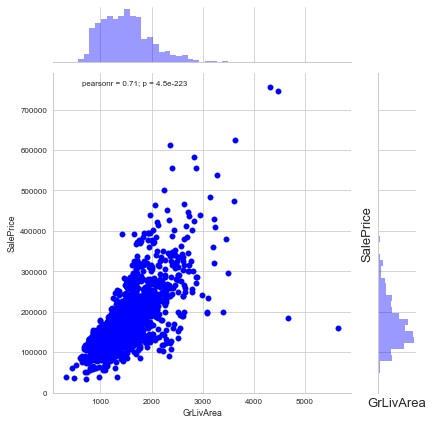

In [30]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(10, 8), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster

sns.jointplot(house_price['GrLivArea'], house_price['SalePrice'], color="b")
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

*We can see at the bottom right two with extremely large GrLivArea that are of a low price. These values are huge oultliers. Therefore, we can safely delete them.*

<Figure size 1000x800 with 0 Axes>

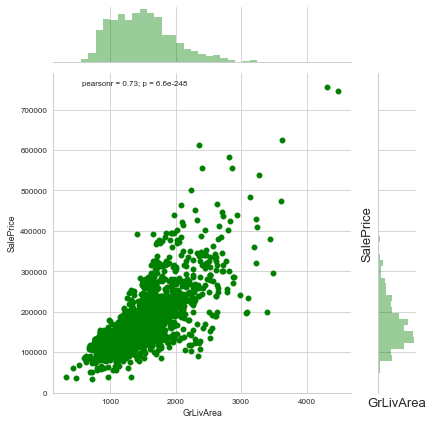

In [31]:
#Deleting outliers
house_price = house_price.drop(house_price[(house_price['GrLivArea']>4000) & (house_price['SalePrice']<300000)].index)

#Check the graphic again
plt.figure(figsize=(10, 8), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster

sns.jointplot(house_price['GrLivArea'], house_price['SalePrice'], color="g")
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

### Inspecting the Target Variable SalePrice

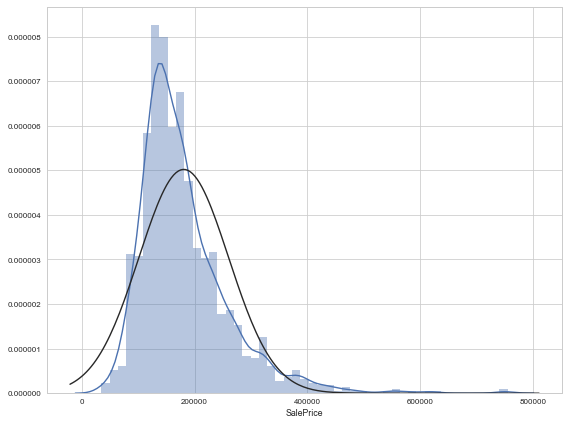

In [32]:
# Represting the distribution of 'SalePrice' 
plt.subplots(figsize=(8,6))
sns.distplot(house_price['SalePrice'] , fit=norm);
# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()
# display the plot
plt.show()

#### Clearly Sales price is right skewed. So, we perform log transformation so that the skewness is reduced to nearly nearly zero.

Skew before log transformation is 1.881296:
Skew after log transformation is 0.121580:


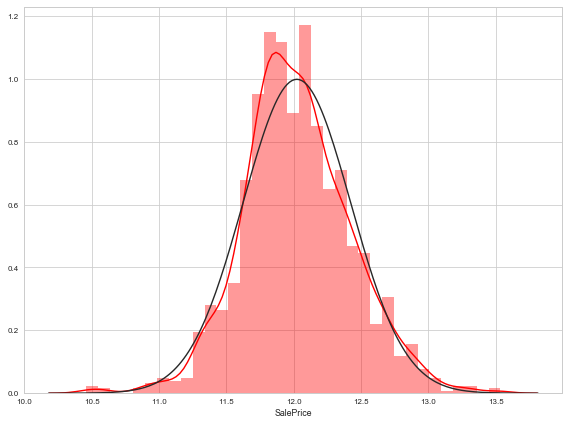

In [33]:
# Determining the Skewness of data prior to log transformation
print ("Skew before log transformation is %f:" % house_price['SalePrice'].skew())

# Performing log transformation on SalePrice
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
house_price["SalePrice"] = np.log1p(house_price["SalePrice"])

# Determining the Skewness of data post log transformation
print ("Skew after log transformation is %f:" % house_price['SalePrice'].skew())

# Represting the distribution of 'SalePrice' 
plt.subplots(figsize=(8,6))
sns.distplot(house_price['SalePrice'] , fit=norm, color="r");
# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()
# display the plot
plt.show()

#### After the Logarithmic conversion, the data distribution is close to normal.

In [34]:
# Inspecting the dataframe shape
house_price.shape

(1458, 75)

### Categorical Feature Transformation Logic

The following methods will be followed for Categorical Feature Transformation:

|Feature Type|Feature Eg with values|Transformation mode|
|------------|----------|-------------------|
|Ordinal|ExterQual(Eg. Ex,Gd,TA,Fa,Po)|Mannual mapping(Eg. 4,3,2,1,0)|
|Binary|CentralAir(Eg. Y/N)|Binary mapping(Eg. 1/0)|
|Nominal|Neighbourhood(Eg. Somerst,etc.)|Dummy Encoding|


### Converting some binary variables (Yes/No) to 1/0

In [35]:
# List of variables to map

varlist =  ['CentralAir']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the housing list
house_price[varlist] = house_price[varlist].apply(binary_map)
house_price[varlist].head()

,CentralAir
0,1
1,1
2,1
3,1
4,1


### Converting some Ordinal variables to their numerical forms based on below manual mapping:

 - <font color = blue>The transformation logic for the following variables are:</font>

|Actual Value|Meaning|Transformed Value|
|---|-----|--------|
|Ex|	Excellent|5|
|Gd|	Good|4|
|TA|	Average/Typical|3|
|Fa|	Fair|2|
|Po|	Poor|1|

In [36]:
# List of variables to map

varlist =  ['ExterQual','ExterCond','HeatingQC','KitchenQual']

# Defining the map function
def manual_map1(x):
    return x.map({'Ex': 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1})

# Applying the function to the housing list
house_price[varlist] = house_price[varlist].apply(manual_map1)
house_price[varlist].head()

,ExterQual,ExterCond,HeatingQC,KitchenQual
0,4,3,5,4
1,3,3,5,3
2,4,3,5,4
3,3,3,4,4
4,4,3,5,4


 - <font color = blue>The transformation logic for the following variables are:</font>
 
|Actual Value|Meaning|Transformed Value|
|---|-----|--------|
|Ex|	Excellent|5|
|Gd|	Good|4|
|TA|	Average/Typical|3|
|Fa|	Fair|2|
|Po|	Poor|1|
|None|	No Basement|0|

In [37]:
# List of variables to map

varlist =  ['BsmtQual','BsmtCond','FireplaceQu','GarageQual','GarageCond']

# Defining the map function
def manual_map2(x):
    return x.map({'Ex': 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0})

# Applying the function to the housing list
house_price[varlist] = house_price[varlist].apply(manual_map2)
house_price[varlist].head()

,BsmtQual,BsmtCond,FireplaceQu,GarageQual,GarageCond
0,4,3,0,3,3
1,4,3,3,3,3
2,4,3,3,3,3
3,3,4,4,3,3
4,4,3,3,3,3


 - <font color = blue>The transformation logic for the following variables are:</font>
 
|Actual Value|Meaning|Transformed Value|
|---|-----|--------|
|Ex|	Excellent|4|
|Gd|	Good|3|
|TA|	Average/Typical|2|
|Fa|	Fair|1|
|None|	No Pool|0|

In [38]:
# List of variables to map

varlist =  ['PoolQC']

# Defining the map function
def manual_map3(x):
    return x.map({'Ex': 5, "Gd": 4, "TA": 3, "Fa": 2, "None": 0})

# Applying the function to the housing list
house_price[varlist] = house_price[varlist].apply(manual_map3)
house_price[varlist].head()

,PoolQC
0,0
1,0
2,0
3,0
4,0


 - <font color = blue>The transformation logic for the following variables are:</font>
 
|Actual Value|Meaning|Transformed Value|
|---|-----|--------|
|GLQ|	Good Living Quarters|6|
|ALQ|	Average Living Quarters|5|
|BLQ|	Below Average Living Quarters|4|	
|Rec|	Average Rec Room|3|
|LwQ|	Low Quality|2|
|Unf|	Unfinshed|1|
|None|	No Basement|0|

In [39]:
# List of variables to map

varlist =  ['BsmtFinType1','BsmtFinType2']

# Defining the map function
def manual_map4(x):
    return x.map({'GLQ': 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, "Unf": 1, "None": 0})

# Applying the function to the housing list
house_price[varlist] = house_price[varlist].apply(manual_map4)
house_price[varlist].head()

,BsmtFinType1,BsmtFinType2
0,6,1
1,5,1
2,6,1
3,5,1
4,6,1


 - <font color = blue>The transformation logic for the following variables are:</font>
 
|Actual Value|Meaning|Transformed Value|
|---|-----|--------|
|Typ|	Typical Functionality|7|
|Min1|	Minor Deductions 1|6|
|Min2|	Minor Deductions 2|5|
|Mod|	Moderate Deductions|4|
|Maj1|	Major Deductions 1|3|
|Maj2|	Major Deductions 2|2|
|Sev|	Severely Damaged|1|
|Sal|	Salvage only|0|

In [40]:
# List of variables to map

varlist =  ['Functional']

# Defining the map function
def manual_map5(x):
    return x.map({'Typ': 7, "Min1": 6, "Min2": 5, "Mod": 4, "Maj1": 3, "Maj2": 2, "Sev": 1, "Sal": 0})

# Applying the function to the housing list
house_price[varlist] = house_price[varlist].apply(manual_map5)
house_price[varlist].head(10)

,Functional
0,7
1,7
2,7
3,7
4,7
5,7
6,7
7,7
8,6
9,7


 - <font color = blue>The transformation logic for the following variables are:</font>
 
|Actual Value|Meaning|Transformed Value|
|---|-----|--------|
|GdPrv|	Good Privacy|4|
|MnPrv|	Minimum Privacy|3|
|GdWo	|Good Wood|2|
|MnWw|	Minimum Wood/Wire|0|
|None|	No Fence|0|

In [41]:
# List of variables to map

varlist =  ['Fence']

# Defining the map function
def manual_map6(x):
    return x.map({"GdPrv": 4, "MnPrv": 3, "GdWo": 2, "MnWw": 1, "None": 0})

# Applying the function to the housing list
house_price[varlist] = house_price[varlist].apply(manual_map6)
house_price[varlist].head(10)

,Fence
0,0
1,0
2,0
3,0
4,0
5,3
6,0
7,0
8,0
9,0


 - <font color = blue>The transformation logic for the following variables are:</font>
 
|Actual Value|Meaning|Transformed Value|
|---|-----|--------|
|Gd|	Good Exposure|4|
|Av|	Average Exposure|3|
|Mn|	Mimimum Exposure|2|
|No|	No Exposure|1|
|None|	No Basement|0|

In [42]:
# List of variables to map

varlist =  ['BsmtExposure']

# Defining the map function
def manual_map7(x):
    return x.map({"Gd": 4, "Av": 3, "Mn": 2, "No": 1, "None": 0})

# Applying the function to the housing list
house_price[varlist] = house_price[varlist].apply(manual_map7)
house_price[varlist].head(10)

,BsmtExposure
0,1
1,4
2,2
3,1
4,3
5,1
6,3
7,2
8,1
9,1


 - <font color = blue>The transformation logic for the following variables are:</font>
 
|Actual Value|Meaning|Transformed Value|
|---|-----|--------|
|Fin|	Finished|3|
|RFn|	Rough Finished|2|	
|Unf|	Unfinished|1|
|None|	No Garage|0|

In [43]:
# List of variables to map

varlist =  ['GarageFinish']

# Defining the map function
def manual_map8(x):
    return x.map({"Fin": 3, "RFn": 2, "Unf": 1, "None": 0})

# Applying the function to the housing list
house_price[varlist] = house_price[varlist].apply(manual_map8)
house_price[varlist].head(10)

,GarageFinish
0,2
1,2
2,2
3,1
4,2
5,1
6,2
7,2
8,1
9,2


 - <font color = blue>The transformation logic for the following variables are:</font>
 
|Actual Value|Meaning|Transformed Value|
|---|-----|--------|
|Gtl|	Gentle slope|0|
|Mod|	Moderate Slope|1|	
|Sev|	Severe Slope|2|

In [44]:
# List of variables to map

varlist =  ['LandSlope']

# Defining the map function
def manual_map9(x):
    return x.map({"Sev": 2, "Mod": 1, "Gtl": 0})

# Applying the function to the housing list
house_price[varlist] = house_price[varlist].apply(manual_map9)
house_price[varlist].head(10)

,LandSlope
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


 - <font color = blue>The transformation logic for the following variables are:</font>
 
|Actual Value|Meaning|Transformed Value|
|---|-----|--------|
|Reg|	Regular|0	|
|IR1|	Slightly irregular|1|
|IR2|	Moderately Irregular|2|
|IR3|	Irregular|3|

In [45]:
# List of variables to map

varlist =  ['LotShape']

# Defining the map function
def manual_map10(x):
    return x.map({"IR3": 2,"IR2": 2, "IR1": 1, "Reg": 0})

# Applying the function to the housing list
house_price[varlist] = house_price[varlist].apply(manual_map10)
house_price[varlist].head(10)

,LotShape
0,0
1,0
2,1
3,1
4,1
5,1
6,0
7,1
8,0
9,0


### Reinspecting Null Values

In [46]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(house_price.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(house_price.isnull().sum()/house_price.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1).head()

,Total,Percentage
TotalSF,0,0.000
YearBuilt,0,0.000
RoofStyle,0,0.000
RoofMatl,0,0.000
Exterior1st,0,0.000


### Derived Metrics

#### We create the following 2 columns for ease of interpretation of the model

 - HouseAge  = YrSold - YearBuilt
 - YearsSinceRemod  = YrSold - YearRemodAdd

In [47]:
house_price['HouseAge'] = house_price['YrSold'] - house_price['YearBuilt']
house_price['YearsSinceRemod'] = house_price['YrSold'] - house_price['YearRemodAdd']
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,HouseAge,YearsSinceRemod
0,1,60,RL,65.000,8450,Pave,None,0,Lvl,Inside,...,None,0,2,2008,WD,Normal,12.248,2566,5,5
1,2,20,RL,80.000,9600,Pave,None,0,Lvl,FR2,...,None,0,5,2007,WD,Normal,12.109,2524,31,31
2,3,60,RL,68.000,11250,Pave,None,1,Lvl,Inside,...,None,0,9,2008,WD,Normal,12.317,2706,7,6
3,4,70,RL,60.000,9550,Pave,None,1,Lvl,Corner,...,None,0,2,2006,WD,Abnorml,11.849,2473,91,36
4,5,60,RL,84.000,14260,Pave,None,1,Lvl,FR2,...,None,0,12,2008,WD,Normal,12.429,3343,8,8


*Plotting a scatter plot between HouseAge, YearsSinceRemod and SalePrice to inspect how the dependent variable is related to the newly built metrcs*

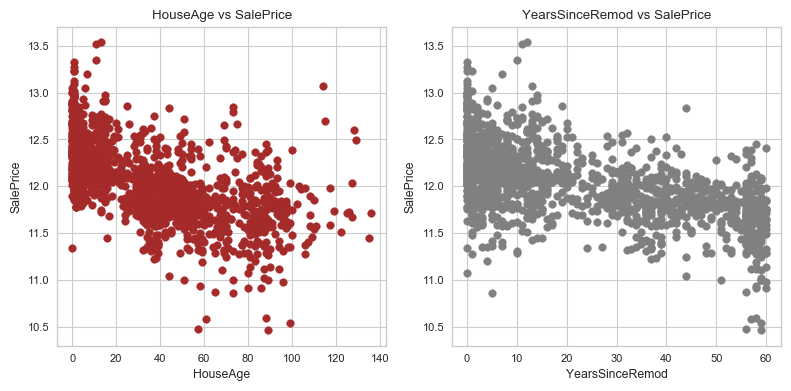

In [48]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(8,4), dpi=100, facecolor='w', edgecolor='k', frameon='True')

# subplot 1
plt.subplot(1, 2, 1)
plt.scatter(house_price['HouseAge'], house_price['SalePrice'], color='brown')
# plot title
plt.title("HouseAge vs SalePrice")
# plot x axis label
plt.xlabel('HouseAge')
# plot y axis label
plt.ylabel('SalePrice')

# subplot 2
plt.subplot(1, 2, 2)
plt.scatter(house_price['YearsSinceRemod'], house_price['SalePrice'], color='grey')
# plot title
plt.title("YearsSinceRemod vs SalePrice")
# plot x axis label
plt.xlabel('YearsSinceRemod')
# plot y axis label
plt.ylabel('SalePrice')

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

In [49]:
# Deleting the columns 'GarageYrBlt','TotRmsAbvGrd','GarageCars','TotalBsmtSF','1stFlrSF','2ndFlrSF' as per the above analysis
columns_to_drop = ['YrSold','YearBuilt','YearRemodAdd']
house_price = house_price.drop(columns_to_drop, axis=1)
house_price.shape

(1458, 74)

### For categorical variables with multiple levels, creating dummy features (one-hot encoded)

In [50]:
# Finding the categorical columns in the dataframe
categorical_features = house_price.dtypes[house_price.dtypes == "object"].index
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'Electrical', 'GarageType', 'PavedDrive',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [51]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(house_price[categorical_features], drop_first=True)

# Adding the results to the master dataframe
house_price = pd.concat([house_price, dummy], axis=1)
house_price.shape

(1458, 220)

### Dropping the repeated variables

In [52]:
# We have created dummies for the below variables, so we can drop them
house_price = house_price.drop(categorical_features, axis=1)
house_price.shape

(1458, 197)

### Ensuring there are no categorical columns left in the dataframe

In [53]:
# Ensuring there are no categorical columns left in the dataframe
cols = house_price.columns
num_cols = house_price._get_numeric_data().columns
list(set(cols) - set(num_cols))

[]

In [54]:
# Creating a copy of this origial variable in case if needed later on
original_house_price = house_price.copy()
print(house_price.shape)
print(original_house_price.shape)

(1458, 197)
(1458, 197)


In [55]:
house_price.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.000,8450,0,0,7,5,196.000,4,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.000,9600,0,0,6,8,0.000,3,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.000,11250,1,0,7,5,162.000,4,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.000,9550,1,0,7,5,0.000,3,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.000,14260,1,0,8,5,350.000,4,...,0,0,0,0,1,0,0,0,1,0


## Step 4: Scaling the Features

In [56]:
# Putting feature variables to X
X = house_price.drop(['Id','SalePrice'], axis=1)

X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.000,8450,0,0,7,5,196.000,4,3,...,0,0,0,0,1,0,0,0,1,0
1,20,80.000,9600,0,0,6,8,0.000,3,3,...,0,0,0,0,1,0,0,0,1,0
2,60,68.000,11250,1,0,7,5,162.000,4,3,...,0,0,0,0,1,0,0,0,1,0
3,70,60.000,9550,1,0,7,5,0.000,3,3,...,0,0,0,0,1,0,0,0,0,0
4,60,84.000,14260,1,0,8,5,350.000,4,3,...,0,0,0,0,1,0,0,0,1,0


In [57]:
# Putting response variable to y
y = house_price['SalePrice']

y.head()

0   12.248
1   12.109
2   12.317
3   11.849
4   12.429
Name: SalePrice, dtype: float64

In [58]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
cols
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=195)

In [59]:
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073,-0.233,-0.204,-0.720,-0.226,0.659,-0.518,0.524,1.061,-0.238,...,-0.059,-0.059,-0.299,-0.045,0.388,-0.052,-0.091,-0.118,0.466,-0.304
1,-0.872,0.466,-0.087,-0.720,-0.226,-0.068,2.178,-0.571,-0.689,-0.238,...,-0.059,-0.059,-0.299,-0.045,0.388,-0.052,-0.091,-0.118,0.466,-0.304
2,0.073,-0.093,0.080,1.080,-0.226,0.659,-0.518,0.334,1.061,-0.238,...,-0.059,-0.059,-0.299,-0.045,0.388,-0.052,-0.091,-0.118,0.466,-0.304
3,0.310,-0.466,-0.092,1.080,-0.226,0.659,-0.518,-0.571,-0.689,-0.238,...,-0.059,-0.059,-0.299,-0.045,0.388,-0.052,-0.091,-0.118,-2.147,-0.304
4,0.073,0.653,0.386,1.080,-0.226,1.385,-0.518,1.384,1.061,-0.238,...,-0.059,-0.059,-0.299,-0.045,0.388,-0.052,-0.091,-0.118,0.466,-0.304


In [60]:
X.describe()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1458.000,1458.000,1458.000,1458.000,1458.000,1458.000,1458.000,1458.000,1458.000,1458.000,...,1458.000,1458.000,1458.000,1458.000,1458.000,1458.000,1458.000,1458.000,1458.000,1458.000
mean,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,...,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-0.872,-2.283,-0.929,-0.720,-0.226,-3.702,-4.112,-0.571,-2.439,-5.934,...,-0.059,-0.059,-0.299,-0.045,-2.576,-0.052,-0.091,-0.118,-2.147,-0.304
25%,-0.872,-0.466,-0.296,-0.720,-0.226,-0.795,-0.518,-0.571,-0.689,-0.238,...,-0.059,-0.059,-0.299,-0.045,0.388,-0.052,-0.091,-0.118,0.466,-0.304
50%,-0.163,0.000,-0.100,-0.720,-0.226,-0.068,-0.518,-0.571,-0.689,-0.238,...,-0.059,-0.059,-0.299,-0.045,0.388,-0.052,-0.091,-0.118,0.466,-0.304
75%,0.310,0.466,0.116,1.080,-0.226,0.659,0.381,0.344,1.061,-0.238,...,-0.059,-0.059,-0.299,-0.045,0.388,-0.052,-0.091,-0.118,0.466,-0.304
max,3.146,11.323,20.778,2.881,7.012,2.839,3.076,8.365,2.811,5.457,...,17.047,17.047,3.339,22.023,0.388,19.066,10.977,8.479,0.466,3.294


## Step 5: Test-Train Split

In [61]:
# split into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [62]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
652,-0.163,-0.466,-0.014,-0.720,-0.226,-0.068,1.279,-0.571,-0.689,-0.238,...,-0.059,-0.059,-0.299,-0.045,0.388,-0.052,-0.091,-0.118,0.466,-0.304
342,0.782,0.140,-0.194,-0.720,-0.226,-2.249,-1.416,1.328,-0.689,-0.238,...,-0.059,-0.059,-0.299,-0.045,0.388,-0.052,-0.091,-0.118,0.466,-0.304
114,0.310,-0.419,-0.325,1.080,3.393,-0.068,2.178,-0.571,-0.689,-0.238,...,-0.059,-0.059,-0.299,-0.045,0.388,-0.052,-0.091,-0.118,0.466,-0.304
805,0.546,0.233,-0.072,-0.720,-0.226,-0.795,-0.518,-0.571,-0.689,-0.238,...,-0.059,-0.059,-0.299,-0.045,0.388,-0.052,-0.091,-0.118,0.466,-0.304
365,0.310,-0.512,0.023,-0.720,-0.226,-0.795,1.279,-0.571,-0.689,2.609,...,-0.059,-0.059,-0.299,-0.045,0.388,-0.052,-0.091,-0.118,0.466,-0.304


In [63]:
print(X_train.shape)
print(X_test.shape)

(1020, 195)
(438, 195)


## Step 6: Model Building - Lasso

*We will use GridSearchCV method and 5 fold cross validation method to determine the optimal value of alpha for our lasso regression.*

In [64]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

*Capturing the output of GridSearchCV method into a dataframe*

In [65]:
cv_results_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.279,0.330,0.192,0.384,0.000,{'alpha': 0.0001},0.895,0.908,0.907,0.905,...,0.902,0.006,3,0.955,0.954,0.953,0.952,0.954,0.954,0.001
1,0.037,0.026,0.000,0.000,0.001,{'alpha': 0.001},0.905,0.909,0.915,0.912,...,0.910,0.003,1,0.951,0.949,0.949,0.947,0.949,0.949,0.001
2,0.011,0.001,0.000,0.000,0.010,{'alpha': 0.01},0.908,0.898,0.922,0.918,...,0.907,0.012,2,0.926,0.925,0.923,0.923,0.925,0.924,0.001
3,0.008,0.003,0.001,0.002,0.050,{'alpha': 0.05},0.852,0.839,0.860,0.858,...,0.842,0.022,4,0.842,0.853,0.841,0.849,0.846,0.846,0.004
4,0.008,0.003,0.002,0.003,0.100,{'alpha': 0.1},0.772,0.763,0.777,0.776,...,0.758,0.028,5,0.756,0.768,0.756,0.770,0.759,0.762,0.006


*Plotting mean test and train R2 scores with all the given values of alpha*

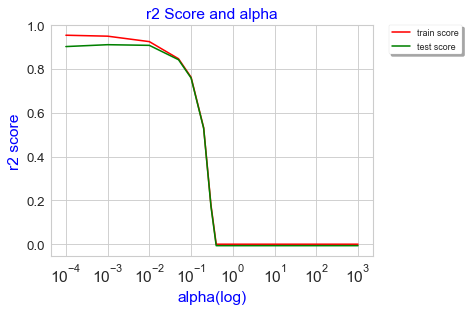

In [66]:
# plotting mean test and train scoes with alpha 

cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(6,4), dpi=80, facecolor='w', edgecolor='k', frameon='True')
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'],color='r')
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'],color='g')
plt.xlabel('alpha(log)',size = 14,color='b')
plt.ylabel('r2 score',size = 14,color='b')
plt.xscale('log')
plt.title("r2 Score and alpha",size = 14,color='b')
plt.legend(['train score', 'test score'], frameon=True,shadow='True',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(size = 14)
plt.yticks(size = 12)
plt.tight_layout()
plt.show()

*Clearly from the plot above, we can see that the optimal value of alpha is .001 at which point, the mean test R2 score is maximum. After this point, if we increase alpha, the model accuracy diminishes rapidly.*

*We will use this value of alpha for further prediction of prices and evaluation of our lasso model.*

In [67]:
lasso_alpha =.001

lasso = Lasso(alpha=lasso_alpha)
        
lasso.fit(X_train, y_train) 
#lasso.coef_

np.round_(lasso.coef_, decimals=3, out=None)

array([-0.014,  0.011,  0.019, -0.002, -0.001,  0.067,  0.043,  0.001,
       -0.   , -0.005,  0.   , -0.   ,  0.013,  0.013,  0.024, -0.   ,
        0.003, -0.   ,  0.009,  0.01 ,  0.   ,  0.089,  0.008, -0.001,
        0.004,  0.01 , -0.002, -0.01 ,  0.011,  0.024,  0.005,  0.012,
        0.007,  0.025,  0.01 ,  0.   ,  0.01 ,  0.005,  0.   ,  0.002,
        0.008,  0.001,  0.   ,  0.   ,  0.   , -0.003,  0.084, -0.059,
       -0.014,  0.028,  0.008,  0.044,  0.027,  0.004, -0.002,  0.004,
        0.003, -0.   ,  0.001,  0.008, -0.002, -0.003, -0.   ,  0.   ,
       -0.006,  0.005,  0.008, -0.   ,  0.026, -0.003, -0.   , -0.006,
       -0.014, -0.001,  0.   ,  0.   , -0.004,  0.004,  0.014, -0.004,
        0.002, -0.   , -0.   ,  0.002,  0.012,  0.   ,  0.006,  0.007,
        0.024,  0.001,  0.003, -0.001,  0.009,  0.   ,  0.008, -0.   ,
       -0.   ,  0.004,  0.   ,  0.   ,  0.   ,  0.001, -0.   ,  0.   ,
       -0.008, -0.001,  0.002, -0.008, -0.007,  0.   , -0.   , -0.   ,
      

In [68]:
# predict and evaluate
y_train_pred_lasso = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_lasso))
y_test_pred_lasso = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.9456883370093447
0.9078739647260397


## Step 7: Determining Feature Importance for Lasso

*Capturing the feature coefficients as obtained from our lasso model*

In [69]:
# lasso model parameters
lasso_model_parameters = list(lasso.coef_)
lasso_model_parameters.insert(0, lasso.intercept_)
lasso_model_parameters = [round(x, 3) for x in lasso_model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_coef = list(zip(cols, lasso_model_parameters))
lasso_coef

[('constant', 12.023),
 ('MSSubClass', -0.014),
 ('LotFrontage', 0.011),
 ('LotArea', 0.019),
 ('LotShape', -0.002),
 ('LandSlope', -0.001),
 ('OverallQual', 0.067),
 ('OverallCond', 0.043),
 ('MasVnrArea', 0.001),
 ('ExterQual', -0.0),
 ('ExterCond', -0.005),
 ('BsmtQual', 0.0),
 ('BsmtCond', -0.0),
 ('BsmtExposure', 0.013),
 ('BsmtFinType1', 0.013),
 ('BsmtFinSF1', 0.024),
 ('BsmtFinType2', -0.0),
 ('BsmtFinSF2', 0.003),
 ('BsmtUnfSF', -0.0),
 ('HeatingQC', 0.009),
 ('CentralAir', 0.01),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.089),
 ('BsmtFullBath', 0.008),
 ('BsmtHalfBath', -0.001),
 ('FullBath', 0.004),
 ('HalfBath', 0.01),
 ('BedroomAbvGr', -0.002),
 ('KitchenAbvGr', -0.01),
 ('KitchenQual', 0.011),
 ('Functional', 0.024),
 ('Fireplaces', 0.005),
 ('FireplaceQu', 0.012),
 ('GarageFinish', 0.007),
 ('GarageArea', 0.025),
 ('GarageQual', 0.01),
 ('GarageCond', 0.0),
 ('WoodDeckSF', 0.01),
 ('OpenPorchSF', 0.005),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.002),
 ('ScreenPorch', 0.0

#### Selecting the coefficients of the selected features from our final model excluding the intercept. 

#### Also lasso model results in feature selection by making the coefficients of these redundant features 0. Thus we filter the features with coefficient value = 0 and keep only those that are significant in predicting the Dependent variable.

In [70]:
lasso_coef_df = pd.DataFrame(lasso_coef)
col_rename = {0:'Features',1: 'Coefficients'}
lasso_coef_df = lasso_coef_df.rename(columns=col_rename)
lasso_coef_df = lasso_coef_df.iloc[1:,:]
lasso_coef_df = lasso_coef_df.loc[lasso_coef_df['Coefficients']!=0.0]
lasso_coef_df = lasso_coef_df.sort_values(by=['Coefficients'], ascending = False)
lasso_coef_df

,Features,Coefficients
22,GrLivArea,0.089
47,TotalSF,0.084
6,OverallQual,0.067
52,MSZoning_RL,0.044
7,OverallCond,0.043
188,SaleType_New,0.034
194,SaleCondition_Normal,0.031
50,MSZoning_FV,0.028
53,MSZoning_RM,0.027
69,Neighborhood_Crawfor,0.026


### Plotting the Features in descending order of Importance based on coefficients for Lasso

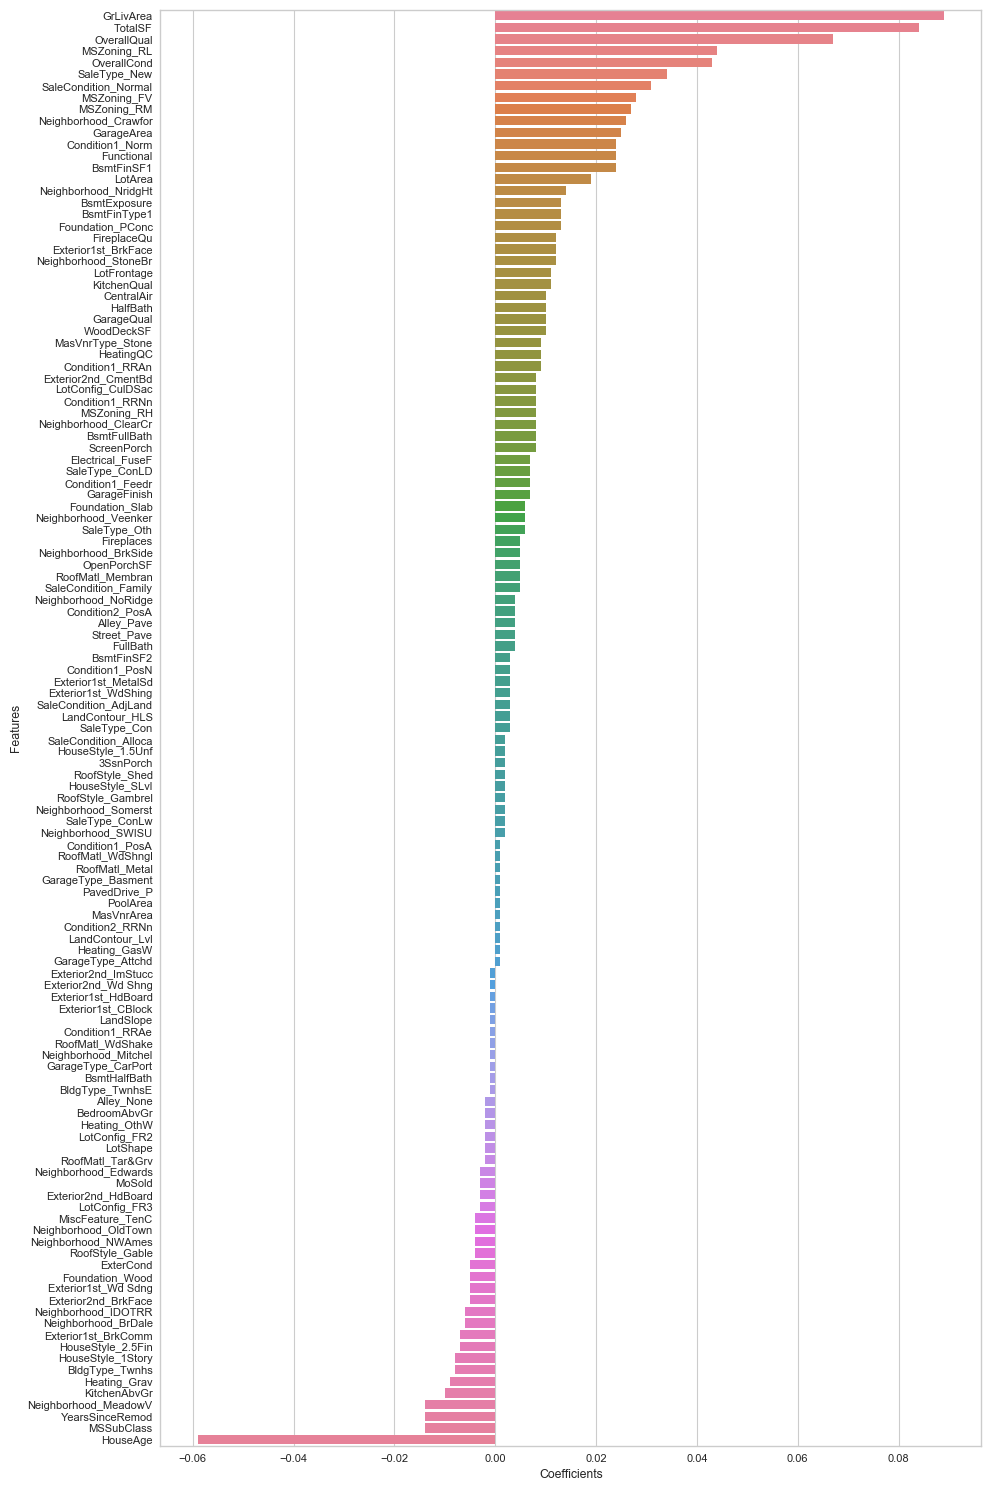

In [71]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(10, 15), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.barplot(y='Features', x='Coefficients', palette='husl', data=lasso_coef_df, estimator=np.sum)
# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

### Top 5 Positive predictors for Sale Price: 
 - Above grade (ground) living area square feet(0.089)
 - Total Area in SF(0.084)
 - The overall material and finish of the house(0.067)
 - Zoning classification of the sale - Residential Low Density(0.044)
 - The overall condition of the house(0.043)
 

### Top 5 Negative predictors for Sale Price: 
 - Age of the House(-0.059)
 - The type of dwelling involved in the sale(-0.014)
 - Years Since Remodelling was done(-0.014)
 - Neighborhood - Meadow Village(-0.014)
 - Kitchens above grade(-0.010)

#### We have already said that lasso model results in feature selection by making the coefficients of these redundant features 0. Ridge model doesnt do feature selection. So we will use the selected features from lasso and create our Ridge model based on those. 

In [72]:
features = np.array(lasso_coef_df['Features'])
features

array(['GrLivArea', 'TotalSF', 'OverallQual', 'MSZoning_RL',
       'OverallCond', 'SaleType_New', 'SaleCondition_Normal',
       'MSZoning_FV', 'MSZoning_RM', 'Neighborhood_Crawfor', 'GarageArea',
       'Condition1_Norm', 'Functional', 'BsmtFinSF1', 'LotArea',
       'Neighborhood_NridgHt', 'BsmtExposure', 'BsmtFinType1',
       'Foundation_PConc', 'FireplaceQu', 'Exterior1st_BrkFace',
       'Neighborhood_StoneBr', 'LotFrontage', 'KitchenQual', 'CentralAir',
       'HalfBath', 'GarageQual', 'WoodDeckSF', 'MasVnrType_Stone',
       'HeatingQC', 'Condition1_RRAn', 'Exterior2nd_CmentBd',
       'LotConfig_CulDSac', 'Condition1_RRNn', 'MSZoning_RH',
       'Neighborhood_ClearCr', 'BsmtFullBath', 'ScreenPorch',
       'Electrical_FuseF', 'SaleType_ConLD', 'Condition1_Feedr',
       'GarageFinish', 'Foundation_Slab', 'Neighborhood_Veenker',
       'SaleType_Oth', 'Fireplaces', 'Neighborhood_BrkSide',
       'OpenPorchSF', 'RoofMatl_Membran', 'SaleCondition_Family',
       'Neighborhood_No

## Step 8: Model Building - Ridge

In [73]:
# Using features selected by lasso for our ridge model
X_train_ridge = X_train[features]
X_test_ridge = X_test[features]
print(X_train_ridge.shape)
print(X_test_ridge.shape)

(1020, 123)
(438, 123)


*We will use GridSearchCV method and 5 fold cross validation method to determine the optimal value of alpha for our ridge regression.*

In [74]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train_ridge, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

*Capturing the output of GridSearchCV method into a dataframe*

In [75]:
cv_results_ridge = pd.DataFrame(model_cv_ridge.cv_results_)
cv_results_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.578,1.149,0.000,0.000,0.000,{'alpha': 0.0001},0.907,0.916,0.921,0.915,...,0.917,0.006,1,0.953,0.951,0.950,0.949,0.949,0.951,0.002
1,0.004,0.002,0.000,0.000,0.001,{'alpha': 0.001},0.907,0.916,0.921,0.915,...,0.917,0.006,2,0.953,0.951,0.950,0.949,0.949,0.951,0.002
2,0.004,0.002,0.000,0.000,0.010,{'alpha': 0.01},0.907,0.916,0.921,0.915,...,0.917,0.006,3,0.953,0.951,0.950,0.949,0.949,0.951,0.002
3,0.002,0.002,0.000,0.000,0.050,{'alpha': 0.05},0.907,0.916,0.921,0.915,...,0.917,0.006,4,0.953,0.951,0.950,0.949,0.949,0.951,0.002
4,0.004,0.003,0.000,0.000,0.100,{'alpha': 0.1},0.907,0.916,0.921,0.915,...,0.917,0.006,5,0.953,0.951,0.950,0.949,0.949,0.951,0.002


 *Plotting mean test and train R2 scores with all the given values of alpha*

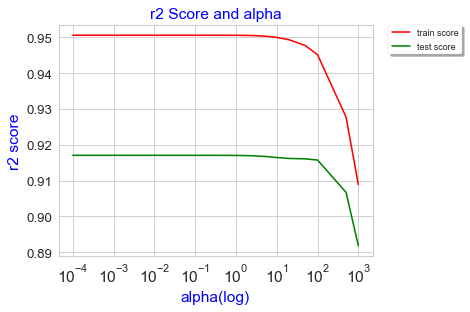

In [76]:
# plotting mean test and train scoes with alpha 
cv_results_ridge['param_alpha'] = cv_results_ridge['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(6,4), dpi=80, facecolor='w', edgecolor='k', frameon='True')
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_train_score'],color='r')
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_test_score'],color='g')
plt.xlabel('alpha(log)',size = 14,color='b')
plt.ylabel('r2 score',size = 14,color='b')
plt.xscale('log')
plt.title("r2 Score and alpha",size = 14,color='b')
plt.legend(['train score', 'test score'], frameon=True,shadow='True',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(size = 14)
plt.yticks(size = 12)
plt.tight_layout()
plt.show()

 *Clearly from the plot above, we can see that the optimal value of alpha is .0001 at which point, the mean test R2 score is maximum. After this point, if we increase alpha, the model accuracy slowly diminishes before going on a node dive.*
 
 *We will use this value of alpha for further prediction of prices and evaluation of our ridge model.*

In [77]:
ridge_alpha = .0001
ridge = Ridge(alpha=ridge_alpha)

ridge.fit(X_train_ridge, y_train)

np.round_(ridge.coef_, decimals=3, out=None)

array([ 0.089,  0.085,  0.06 ,  0.126,  0.042,  0.034,  0.033,  0.069,
        0.099,  0.027,  0.026,  0.035,  0.027,  0.024,  0.02 ,  0.017,
        0.013,  0.014,  0.013,  0.013,  0.015,  0.015,  0.012,  0.011,
        0.012,  0.011,  0.009,  0.011,  0.011,  0.01 ,  0.015,  0.01 ,
        0.01 ,  0.011,  0.031,  0.009,  0.008,  0.01 ,  0.009,  0.012,
        0.015,  0.007,  0.007,  0.007,  0.008,  0.003,  0.005,  0.007,
        0.006,  0.007,  0.005,  0.006,  0.007,  0.005,  0.006,  0.004,
        0.008,  0.006,  0.007,  0.005,  0.007,  0.004,  0.003,  0.002,
        0.003,  0.005,  0.003,  0.002,  0.001,  0.003,  0.004,  0.004,
        0.001,  0.001,  0.003,  0.001,  0.003,  0.001,  0.002,  0.004,
        0.004,  0.004, -0.002, -0.004,  0.001, -0.002, -0.002,  0.001,
       -0.004, -0.002, -0.001, -0.   , -0.002, -0.003, -0.006, -0.003,
       -0.004, -0.005, -0.003, -0.006, -0.004, -0.005, -0.004, -0.006,
       -0.004, -0.005, -0.006, -0.006, -0.006, -0.006, -0.009, -0.   ,
      

In [78]:
# predict and evaluate
y_train_pred_ridge = ridge.predict(X_train_ridge)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_ridge))
y_test_pred_ridge = ridge.predict(X_test_ridge)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.9479868392176054
0.9059011127587455


## Step 9: Determining Feature Importance for Lasso

*Capturing the feature coefficients as obtained from our ridge model*

In [79]:
# ridge model parameters
ridge_model_parameters = list(ridge.coef_)
ridge_model_parameters.insert(0, ridge.intercept_)
ridge_model_parameters = [round(x, 3) for x in ridge_model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
ridge_coef = list(zip(cols, ridge_model_parameters))
ridge_coef

[('constant', 12.023),
 ('MSSubClass', 0.089),
 ('LotFrontage', 0.085),
 ('LotArea', 0.06),
 ('LotShape', 0.126),
 ('LandSlope', 0.042),
 ('OverallQual', 0.034),
 ('OverallCond', 0.033),
 ('MasVnrArea', 0.069),
 ('ExterQual', 0.099),
 ('ExterCond', 0.027),
 ('BsmtQual', 0.026),
 ('BsmtCond', 0.035),
 ('BsmtExposure', 0.027),
 ('BsmtFinType1', 0.024),
 ('BsmtFinSF1', 0.02),
 ('BsmtFinType2', 0.017),
 ('BsmtFinSF2', 0.013),
 ('BsmtUnfSF', 0.014),
 ('HeatingQC', 0.013),
 ('CentralAir', 0.013),
 ('LowQualFinSF', 0.015),
 ('GrLivArea', 0.015),
 ('BsmtFullBath', 0.012),
 ('BsmtHalfBath', 0.011),
 ('FullBath', 0.012),
 ('HalfBath', 0.011),
 ('BedroomAbvGr', 0.009),
 ('KitchenAbvGr', 0.011),
 ('KitchenQual', 0.011),
 ('Functional', 0.01),
 ('Fireplaces', 0.015),
 ('FireplaceQu', 0.01),
 ('GarageFinish', 0.01),
 ('GarageArea', 0.011),
 ('GarageQual', 0.031),
 ('GarageCond', 0.009),
 ('WoodDeckSF', 0.008),
 ('OpenPorchSF', 0.01),
 ('EnclosedPorch', 0.009),
 ('3SsnPorch', 0.012),
 ('ScreenPorch',

#### Selecting the coefficients of the selected features from our final model excluding the intercept

In [80]:
ridge_coef_df = pd.DataFrame(ridge_coef)
col_rename = {0:'Features',1: 'Coefficients'}
ridge_coef_df = ridge_coef_df.rename(columns=col_rename)
ridge_coef_df = ridge_coef_df.iloc[1:,:]
ridge_coef_df = ridge_coef_df.sort_values(by=['Coefficients'], ascending = False)
ridge_coef_df

,Features,Coefficients
4,LotShape,0.126
9,ExterQual,0.099
1,MSSubClass,0.089
2,LotFrontage,0.085
8,MasVnrArea,0.069
3,LotArea,0.060
5,LandSlope,0.042
12,BsmtCond,0.035
6,OverallQual,0.034
7,OverallCond,0.033


### Plotting the Features in descending order of Importance based on coefficients for Ridge

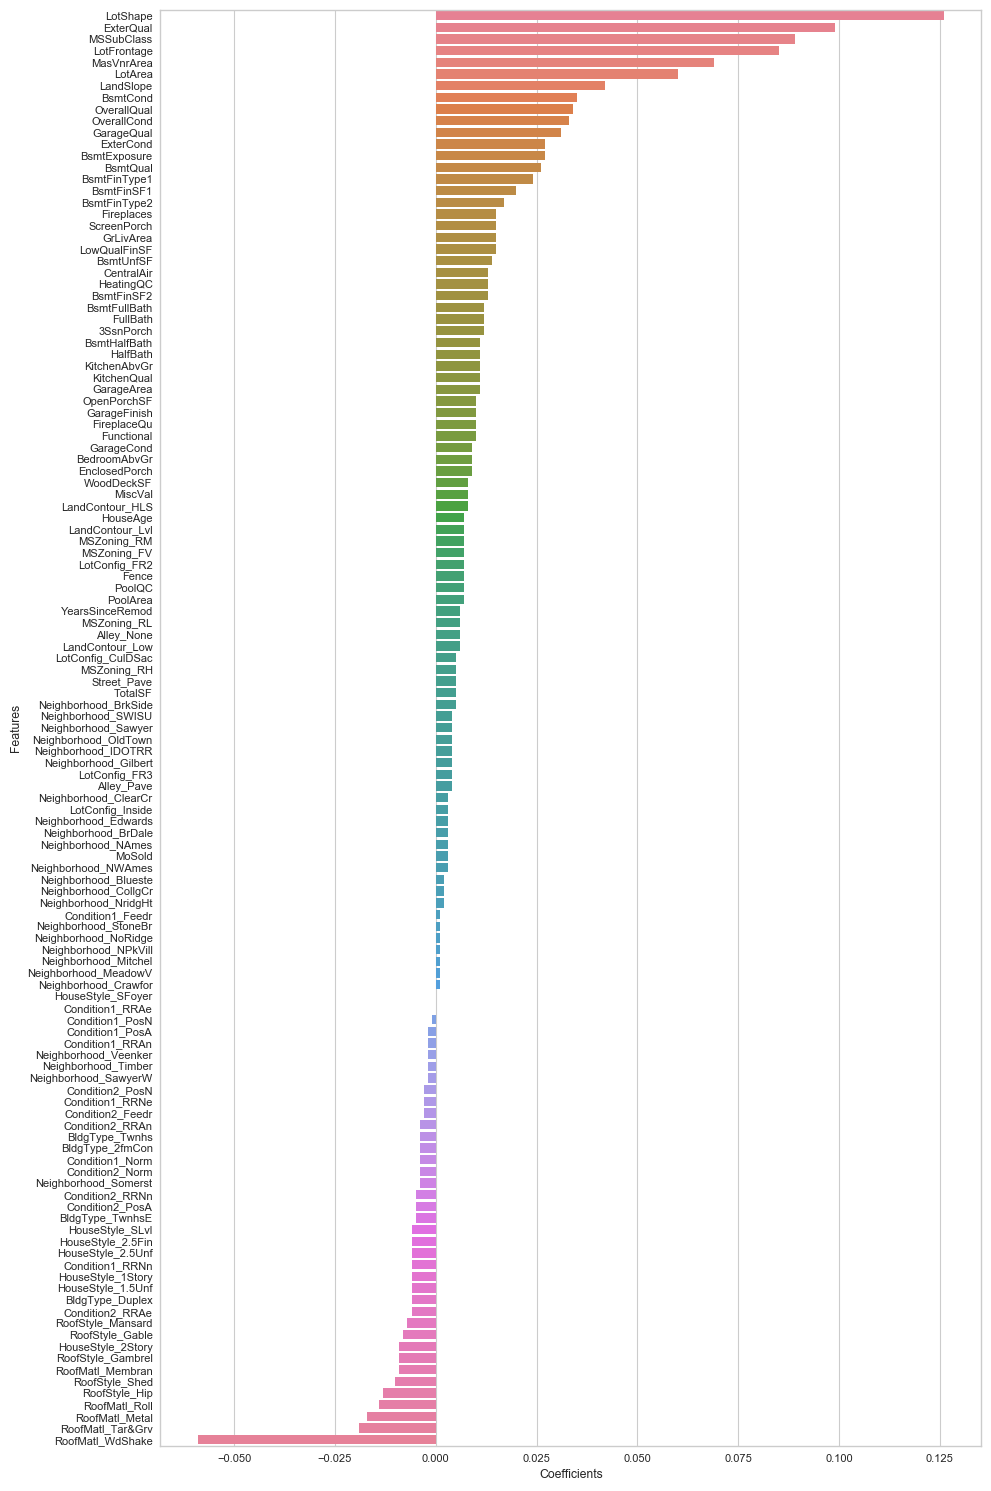

In [81]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(10, 15), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.barplot(y='Features', x='Coefficients', palette='husl', data=ridge_coef_df, estimator=np.sum)
# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

### Top 5 Positive predictors for Sale Price: 
 - General shape of property(0.126)
 - The quality of the material on the exterior(0.099)
 - The type of dwelling involved in the sale(0.089)
 - Linear feet of street connected to property(0.085)
 - Masonry veneer area in square feet(0.069)


### Top 5 Negative predictors for Sale Price: 
 - Roof material - Wood Shakes(-0.059)
 - Roof material - Gravel & Tar(-0.019)
 - Roof material - Metal(-0.017)
 - Roof material - Roll(-0.014)
 - Type of roof - Hip(-0.013)

## Step 10: Residual Analysis of the test data for both Lasso & Ridge

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

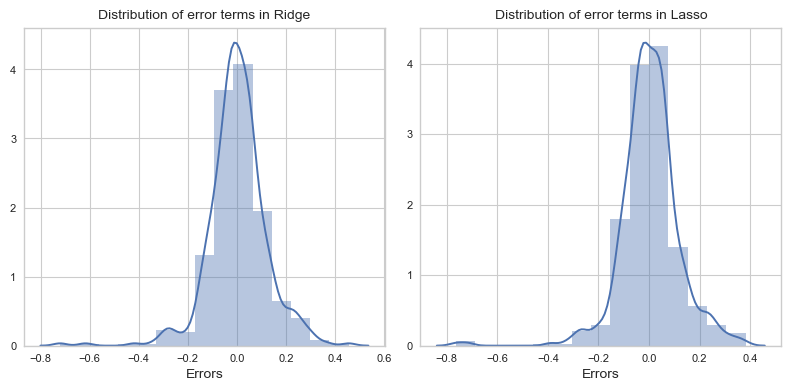

In [82]:
# Plot the histogram of the error terms
plt.figure(figsize=(8,4), dpi=100, facecolor='w', edgecolor='k', frameon='True')

# subplot 1
plt.subplot(1, 2, 1)
sns.distplot((y_test - y_test_pred_ridge), bins = 15) 
plt.xlabel('Errors', fontsize = 10)                         # X-label
plt.title("Distribution of error terms in Ridge", fontsize = 10)

# subplot 2
plt.subplot(1, 2, 2)
sns.distplot((y_test - y_test_pred_lasso), bins = 15) 
plt.xlabel('Errors', fontsize = 10)                         # X-label
plt.title("Distribution of error terms in Lasso", fontsize = 10)

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

#### The above plots show that the error terms are normally distributed with mean value at 0.

*Now let us look at the variance of the error terms*

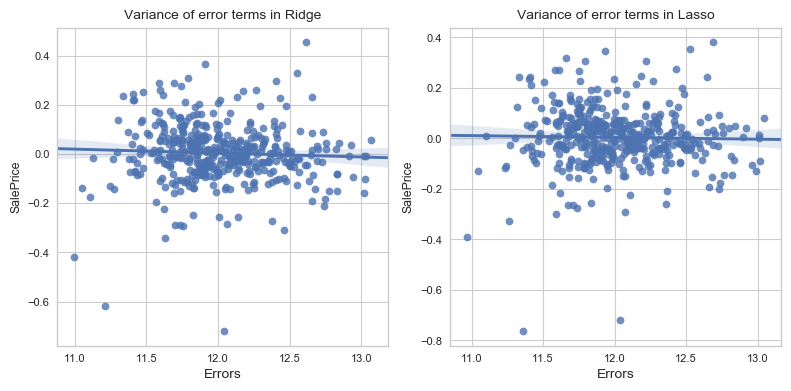

In [83]:
# Plot the histogram of the error terms
plt.figure(figsize=(8,4), dpi=100, facecolor='w', edgecolor='k', frameon='True')

# subplot 1
plt.subplot(1, 2, 1)
sns.regplot(y_test_pred_ridge, (y_test-y_test_pred_ridge))
plt.xlabel('Errors', fontsize = 10)                         # X-label
plt.title("Variance of error terms in Ridge", fontsize = 10)

# subplot 2
plt.subplot(1, 2, 2)
sns.regplot(y_test_pred_lasso, (y_test-y_test_pred_lasso))
plt.xlabel('Errors', fontsize = 10)                         # X-label
plt.title("Variance of error terms in Lasso", fontsize = 10)

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

#### The above plots show that the error terms have a constant variance.

## Step 11: Model Evaluation on test data for both Lasso & Ridge

#### Plotting the best fit line on test data

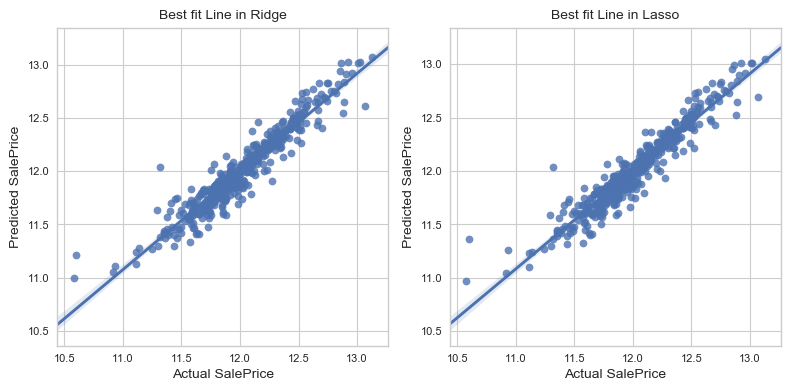

In [84]:
# Plot the histogram of the error terms
plt.figure(figsize=(8,4), dpi=100, facecolor='w', edgecolor='k', frameon='True')

# subplot 1
plt.subplot(1, 2, 1)
sns.regplot(y_test, y_test_pred_ridge)
plt.xlabel('Actual SalePrice', fontsize = 10)                         # X-label
plt.ylabel('Predicted SalePrice', fontsize = 10) 
plt.title("Best fit Line in Ridge", fontsize = 10)

# subplot 2
plt.subplot(1, 2, 2)
sns.regplot(y_test, y_test_pred_lasso)
plt.xlabel('Actual SalePrice', fontsize = 10)                         # X-label
plt.ylabel('Predicted SalePrice', fontsize = 10)                         # Y-label
plt.title("Best fit Line in Lasso", fontsize = 10)

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

*The above plot confirms that line that has been plotted based on beta coefficients represent the data points pretty well.*

#### Plotting the actual and predicted price values from the test dataset so check the likeness

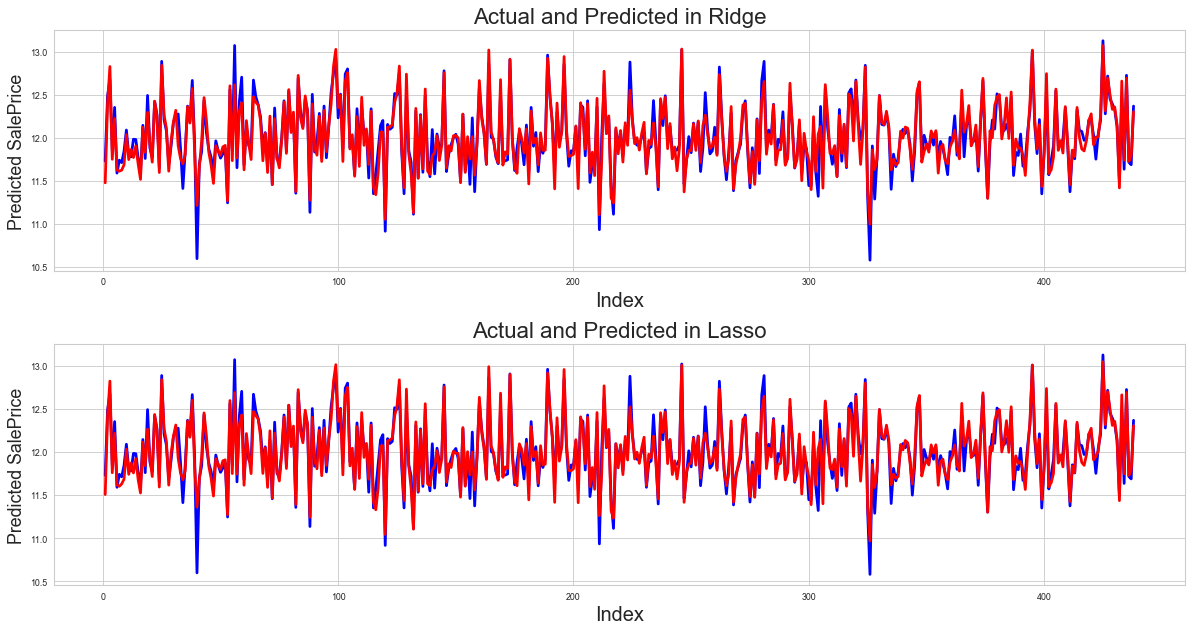

In [85]:
#Actual vs Predicted
c = [i for i in range(1,439,1)]
fig = plt.figure(figsize=(15,8), dpi=80, facecolor='w', edgecolor='k', frameon='True')

# subplot 1
plt.subplot(2, 1, 1)
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-", alpha=1)
plt.plot(c,y_test_pred_ridge, color="red",  linewidth=2.5, linestyle="-", alpha=1)
plt.title('Actual and Predicted in Ridge', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Predicted SalePrice', fontsize=16)                               # Y-label

# subplot 2
plt.subplot(2, 1, 2)
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-", alpha=1)
plt.plot(c,y_test_pred_lasso, color="red",  linewidth=2.5, linestyle="-", alpha=1)
plt.title('Actual and Predicted in Lasso', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Predicted SalePrice', fontsize=16)                               # Y-label

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

#### Determining the r2 score, adjusted r2 score, rmse, aic, bic of the Lasso model on the test dataset

In [86]:
from sklearn.metrics import r2_score
r2_lasso = r2_score(y_true=y_test, y_pred=y_test_pred_lasso)
print ("R2 score on test data with Lasso regularization is %f" % r2_lasso)

# Adjusted R^2 = 1−(1−R2)(N−1)/(N−p−1)
# Here, N is the sample size meaning the number of rows you'd have in the dataset and p is the number of predictor variables.
Adj_r2_lasso = 1-(.092126*437/242)
print ("Adjusted R2 score on test data with Lasso regularization is %f" % Adj_r2_lasso)

# Looking at the RMSE (helps in model comparison)
from sklearn.metrics import mean_squared_error
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
print ("RMSE score on test data with Lasso regularization is %f" % rmse_lasso)

from RegscorePy import *
aic_lasso = aic.aic(y_test, y_test_pred_lasso, 195)
print ("AIC score on test data with Lasso regularization is %f" % aic_lasso)

from RegscorePy import *
bic_lasso = bic.bic(y_test, y_test_pred_lasso, 195)
print ("BIC score on test data with Lasso regularization is %f" % bic_lasso)

R2 score on test data with Lasso regularization is 0.907874
Adjusted R2 score on test data with Lasso regularization is 0.833640
RMSE score on test data with Lasso regularization is 0.117544
AIC score on test data with Lasso regularization is -1485.463577
BIC score on test data with Lasso regularization is -689.430890


#### Determining the r2 score, adjusted r2 score, rmse, aic, bic of the Ridge model on the test dataset

In [87]:
from sklearn.metrics import r2_score
r2_ridge = r2_score(y_true=y_test, y_pred=y_test_pred_ridge)
print ("R2 score on test data with Ridge regularization is %f" % r2_ridge)

# Adjusted R^2 = 1−((1−R2)(N−1)/(N−p−1))
# Here, N is the sample size meaning the number of rows you'd have in the dataset and p is the number of predictor variables.
Adj_r2_ridge = 1 - .094099*437/314
print ("Adjusted R2 score on test data with Ridge regularization is %f" % Adj_r2_ridge)

# Looking at the RMSE (helps in model comparison)
from sklearn.metrics import mean_squared_error
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
print ("RMSE score on test data with Ridge regularization is %f" % rmse_ridge)

from RegscorePy import *
aic_ridge = aic.aic(y_test, y_test_pred_ridge, 123)
print ("AIC score on test data with Ridge regularization is %f" % aic_ridge)

from RegscorePy import *
bic_ridge = bic.bic(y_test, y_test_pred_ridge, 123)
print ("BIC score on test data with Ridge regularization is %f" % bic_ridge)

R2 score on test data with Ridge regularization is 0.905901
Adjusted R2 score on test data with Ridge regularization is 0.869041
RMSE score on test data with Ridge regularization is 0.118796
AIC score on test data with Ridge regularization is -1620.182956
BIC score on test data with Ridge regularization is -1118.070030


## Step 12: Summary

### <font color = blue>Regression models using regularization techniques - `Ridge` and `Lasso` were built to predict the actual value of the prospective properties with the available independent variables:</font>

`GridSearchCV` method with 5 folds was used to determine the optimal values of the hyperparameter lambda(`λ`) for both Ridge and Lasso regression models. For Ridge it was found out to be `0.0001` and for Lasso Regression the value was `0.001`.

The various evaluation properties of both the models are featured below:

|Evaluation Properties|Ridge|Lasso|
|---------------------|-----|-----|
|<font color = blue>Optimal λ</font>|0.0001|0.001|
|<font color = blue>R-squared</font>|0.905901|0.907874|
|<font color = blue>Adj. R-squared</font>|0.869041|0.833640|
|<font color = blue>RMSE</font>|0.118796|0.117544|
|<font color = blue>AIC</font>|-1620.182956|-1485.463577|
|<font color = blue>BIC</font>|-1118.070030|-689.430890|


### <font color = blue>The top 5 predictors(positive & negative) that affect the SalePrice of Houses in Ridge and Lasso Regression are as follow:</font>


|Lasso Regression||Ridge Regression||
|----------------||----------------||
|<font color = red>Top Positive Predictors</font>|<font color = red>Coefficient Values</font>|<font color = red>Top Positive Predictors</font>|<font color = red>Coefficient Values</font>|
|<font color = blue>Above grade (ground) living area square feet</font>|`0.089`|<font color = blue>General shape of property</font>|`0.126`|
|<font color = blue>Total Area in SF</font>|`0.084`|<font color = blue>The quality of the material on the exterior</font>|`0.099`|
|<font color = blue>The overall material and finish of the house</font>|`0.067`|<font color = blue>The type of dwelling involved in the sale</font>|`0.089`|
|<font color = blue>Zoning classification of the sale - Residential Low Density</font>|`0.044`|<font color = blue>Linear feet of street connected to property</font>|`0.085`|
|<font color = blue>The overall condition of the house</font>|`0.043`|<font color = blue>Masonry veneer area in square feet</font>|`0.069`|
|<font color = red>Top Negative Predictors</font>|<font color = red>Coefficient Values</font>|<font color = red>Top Negative Predictors</font>|<font color = red>Coefficient Values</font>|
|<font color = blue>Age of the House</font>|`-0.059`|<font color = blue>Roof material - Wood Shakes</font>|`-0.059`|
|<font color = blue>The type of dwelling involved in the sale</font>|`-0.014`|<font color = blue>Roof material - Gravel & Tar</font>|`-0.019`|
|<font color = blue>Neighborhood - Meadow Village</font>|`-0.014`|<font color = blue>Roof material - Metal</font>|`-0.017`|
|<font color = blue>Years Since Remodelling was done</font>|`-0.014`|<font color = blue>Roof material - Roll</font>|`-0.014`|
|<font color = blue>Kitchens above grade</font>|`-0.010`|<font color = blue>Type of roof - Hip</font>|`-0.013`|